In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import pandas as pd
import cv2
import os
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from math import inf
from keras.utils import to_categorical
import torch.nn.functional as F
from torchviz import make_dot


import PySimpleGUI as sg
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt




import io


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


In [2]:
import torchvision.transforms as transforms

In [3]:
label_data = pd.read_csv(r"C:\Users\Acer\Downloads\archive (2)\UCF101TrainTestSplits-RecognitionTask\ucfTrainTestlist\classInd.txt", sep=' ', header=None)
label_data.columns=['index', 'labels']
label_data = label_data.drop(['index'], axis=1)
label_data.head()

,labels
0,ApplyEyeMakeup
1,ApplyLipstick
2,Archery
3,BabyCrawling
4,BalanceBeam


In [37]:
path=[]
for label in label_data.labels.values:
    path.append(r"C:/Users/Acer/Downloads/archive/UCF101/UCF-101/"+label+"/")
path[0]

'C:/Users/Acer/Downloads/archive/UCF101/UCF-101/ApplyEyeMakeup/'

In [5]:
def feature_extraction(video_path):
    width=128
    height=192
    sequence_length=10
    frames_list=[]

    video_reader = cv2.VideoCapture(video_path)
 
    frame_count=int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    skip_interval = max(int(frame_count/sequence_length), 1)

    for counter in range(sequence_length):
      
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, counter * skip_interval)

        ret, frame = video_reader.read()
        if not ret:
            break;
    
        frame=cv2.resize(frame, (height, width))
        frame = frame/255
 
        frames_list.append(frame)
    video_reader.release()

    return frames_list

In [4]:
def load_video(datasets,aa):
    global image
    label_index=aa
    labels=[]
    images=[]

    for folder in datasets:
        for file in tqdm(os.listdir(folder)):

            video_path = os.path.join(folder, file)
  
            frames_list = feature_extraction(video_path)
            images.append(frames_list)
            labels.append(label_index)
        label_index+=1
    return np.array(images, dtype='float16'), np.array(labels, dtype='int8')

In [42]:
images1, labels1 = load_video(path[:10],0)

100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [00:05<00:00, 31.44it/s]


In [46]:
del images1, labels1

In [43]:
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\images1.npy", images1)
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\labels1.npy", labels1)

In [44]:
images2, labels2 = load_video(path[10:20],10)


100%|████████████████████████████████████████████████████████████████████████████████| 131/131 [00:09<00:00, 13.52it/s]


In [47]:
del images2, labels2

In [45]:
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\images2.npy", images2)
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\labels2.npy", labels2)

In [12]:
images3, labels3 = load_video(path[20:30],20)


100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [00:07<00:00, 16.13it/s]


In [13]:
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\images3.npy", images3)
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\labels3.npy", labels3)

In [15]:
images4, labels4 = load_video(path[30:40],30)

100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:03<00:00, 31.37it/s]


In [16]:
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\images4.npy", images4)
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\labels4.npy", labels4)

In [18]:
images5, labels5 = load_video(path[40:50],40)

100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:09<00:00, 12.86it/s]


In [19]:
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\images5.npy", images5)
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\labels5.npy", labels5)

In [11]:
images6, labels6 = load_video(path[50:60],50)

100%|████████████████████████████████████████████████████████████████████████████████| 151/151 [00:10<00:00, 14.61it/s]


In [12]:
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\images6.npy", images6)
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\labels6.npy", labels6)

In [13]:
images7, labels7 = load_video(path[60:70],60)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 35.79it/s]


In [14]:
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\images7.npy", images7)
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\labels7.npy", labels7)

In [6]:
images8, labels8 = load_video(path[70:80],70)

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:06<00:00, 17.19it/s]


In [7]:
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\images8.npy", images8)
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\labels8.npy", labels8)

In [10]:
images9, labels9 = load_video(path[80:90],80)

100%|████████████████████████████████████████████████████████████████████████████████| 140/140 [00:15<00:00,  9.31it/s]


In [11]:
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\images9.npy", images9)
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\labels9.npy", labels9)

In [13]:
images10, labels10 = load_video(path[90:101],90)

100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:03<00:00, 36.01it/s]


In [14]:
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\images10.npy", images10)
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\labels10.npy", labels10)

In [48]:


images = np.load(r"C:\Users\Acer\Jupyter sample code python\UCF 101\images1.npy")
labels = np.load(r"C:\Users\Acer\Jupyter sample code python\UCF 101\labels1.npy")


num_sets = 2


for i in range(2, num_sets + 1):

    next_images = np.load(f"C:\\Users\\Acer\\Jupyter sample code python\\UCF 101\\images{i}.npy")
    next_labels = np.load(f"C:\\Users\\Acer\\Jupyter sample code python\\UCF 101\\labels{i}.npy")


    images = np.concatenate((images, next_images))
    labels = np.concatenate((labels, next_labels))


    del next_images
    del next_labels


In [49]:
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\images_temp.npy", images)
np.save(r"C:\Users\Acer\Jupyter sample code python\UCF 101\labels_temp.npy", labels)

In [50]:
images = np.load(r"C:\Users\Acer\Jupyter sample code python\UCF 101\images_temp.npy")
labels = np.load(r"C:\Users\Acer\Jupyter sample code python\UCF 101\labels_temp.npy")

In [51]:
images.shape, pd.Series(labels).shape

((2694, 10, 128, 192, 3), (2694,))

In [52]:
x_train, x_test, y_train, y_test=train_test_split(images, labels, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, np.array(y_train).shape, np.array(y_test).shape

((2155, 10, 128, 192, 3), (539, 10, 128, 192, 3), (2155,), (539,))

In [54]:
import numpy as np

# Save x_train
np.save('x_train.npy', x_train)

# Save x_test
np.save('x_test.npy', x_test)

# Save y_train
np.save('y_train.npy', np.array(y_train))

# Save y_test
np.save('y_test.npy', np.array(y_test))


In [20]:
del images,labels

In [57]:
import numpy as np

# Load x_train
x_train1 = np.load('x_train.npy')


In [58]:
print(x_train1== x_train)

array([[[[[ True,  True,  True],
          [ True,  True,  True],
          [ True,  True,  True],
          ...,
          [ True,  True,  True],
          [ True,  True,  True],
          [ True,  True,  True]],

         [[ True,  True,  True],
          [ True,  True,  True],
          [ True,  True,  True],
          ...,
          [ True,  True,  True],
          [ True,  True,  True],
          [ True,  True,  True]],

         [[ True,  True,  True],
          [ True,  True,  True],
          [ True,  True,  True],
          ...,
          [ True,  True,  True],
          [ True,  True,  True],
          [ True,  True,  True]],

         ...,

         [[ True,  True,  True],
          [ True,  True,  True],
          [ True,  True,  True],
          ...,
          [ True,  True,  True],
          [ True,  True,  True],
          [ True,  True,  True]],

         [[ True,  True,  True],
          [ True,  True,  True],
          [ True,  True,  True],
          ...,
          [

In [18]:
del model

In [6]:
y_train = to_categorical(y_train, 20)
y_test = to_categorical(y_test,20)

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [9]:
torch.cuda.is_available()

False

In [8]:
from torchmetrics import Accuracy

In [9]:
train_accuracy = Accuracy(num_classes=20,task='multiclass').to(device)
test_accuracy = Accuracy(num_classes=20,task='multiclass').to(device)


In [6]:
class VideoModel(nn.Module):
    def __init__(self, num_classes=20):
        super(VideoModel, self).__init__()
        
        self.slice_conv = nn.Sequential(
            nn.BatchNorm2d(3,momentum=0.8),
            nn.Conv2d(3, 20, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(20,momentum=0.8),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(20, 30, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(30,momentum=0.8),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(30, 30, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        
        self.conv3d = nn.Sequential(
            nn.Conv3d(30, 50, kernel_size=3, padding=1),
            nn.BatchNorm3d(50,momentum=0.8),
            nn.ReLU(inplace=True),
            nn.Conv3d(50, 60, kernel_size=3, padding=1),
            nn.BatchNorm3d(60,momentum=0.8),
            nn.ReLU(inplace=True),
            nn.Conv3d(60, 70, kernel_size=3, padding=1),
            nn.BatchNorm3d(70,momentum=0.8),
            nn.ReLU(inplace=True)
        )
        
        self.gru1 = nn.GRU(input_size=32*48*70, hidden_size=1000, batch_first=True)
        
#         self.gru1 = nn.GRU(input_size=32*48*50, hidden_size=25, batch_first=True, num_layers=1)
#         self.gru2 = nn.GRU(input_size=25, hidden_size=50, batch_first=True, num_layers=2, dropout=0.5)
#         self.gru1 = nn.GRU(input_size=32*48*50, hidden_size=25, batch_first=True)
        
        self.gru2 = nn.GRU(input_size=1000, hidden_size=50, batch_first=True)
  
        self.dropout = nn.Dropout(0.5)
#         self.dropout1 = nn.Dropout(0.2)
        self.fc = nn.Sequential(
            nn.Linear(50, 100),  # Change the input size to 50
            nn.ReLU(inplace=True),
            nn.Linear(100, num_classes)
        )



    def forward(self, x):
        batch_size, timesteps, C, H, W = x.size()
        conv_slices = []

        for t in range(timesteps):
            slice_t = x[:, t, :, :, :]
            slice_t = self.slice_conv(slice_t)
            conv_slices.append(slice_t)

        x = torch.stack(conv_slices, dim=2)
        x = self.conv3d(x)
        x = x.reshape(batch_size, timesteps, -1)
        x, _ = self.gru1(x)
#         x = self.dropout1(x)
        x, _ = self.gru2(x)
        # x, _ = self.gru3(x)
        x = self.dropout(x)
        x = self.fc(x[:, -1, :])
        return x


In [4]:
device= 'cpu'

In [7]:

model_path = r"C:\Users\Acer\Downloads\best_video_model.pth"
num_classes = 20  # Adjust this to match the number of classes in your dataset
saved_model = VideoModel(num_classes=num_classes)
saved_model.load_state_dict(torch.load(model_path))
saved_model.eval()
saved_model.to(device)


VideoModel(
  (slice_conv): Sequential(
    (0): BatchNorm2d(3, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
    (1): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU(inplace=True)
    (3): BatchNorm2d(20, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): BatchNorm2d(30, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
  )
  (conv3d): Sequential(
    (0): Conv3d(30, 50, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(50, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
    (2): ReLU(in

In [8]:
def preprocess_video(video_path):
    frames_list = feature_extraction(video_path)
    video_tensor = torch.from_numpy(np.array(frames_list)).float()
    video_tensor = video_tensor.permute(0, 3, 1, 2)
    return video_tensor.unsqueeze(0).to(device)
def predict_video_label(video_path,saved_model):
    video_tensor = preprocess_video(video_path)
    saved_model.eval()
    with torch.no_grad():
        output = saved_model(video_tensor)
        probabilities = torch.softmax(output, dim=1).squeeze()
        predicted_label_index = torch.argmax(probabilities).item()
        predicted_label = label_data.iloc[predicted_label_index]["labels"]
    return predicted_label
video_path = r"C:\Users\Acer\Downloads\archive\UCF101\UCF-101\BenchPress\v_BenchPress_g01_c02.avi"
predicted_label = predict_video_label(video_path,saved_model)
print(f'Predicted label: {predicted_label}')


Predicted label: BenchPress


In [22]:
saved_model
num_params = sum(p.numel() for p in saved_model.parameters())
print(f"Number of parameters: {num_params}")

Number of parameters: 8334361


In [9]:
def print_params(model):
    for name, param in model.named_parameters():
        print(f"{name}: {param.numel()}")

print_params(saved_model)

slice_conv.0.weight: 3
slice_conv.0.bias: 3
slice_conv.1.weight: 540
slice_conv.1.bias: 20
slice_conv.3.weight: 20
slice_conv.3.bias: 20
slice_conv.5.weight: 5400
slice_conv.5.bias: 30
slice_conv.7.weight: 30
slice_conv.7.bias: 30
slice_conv.9.weight: 8100
slice_conv.9.bias: 30
conv3d.0.weight: 40500
conv3d.0.bias: 50
conv3d.1.weight: 50
conv3d.1.bias: 50
conv3d.3.weight: 81000
conv3d.3.bias: 60
conv3d.4.weight: 60
conv3d.4.bias: 60
conv3d.6.weight: 113400
conv3d.6.bias: 70
conv3d.7.weight: 70
conv3d.7.bias: 70
gru1.weight_ih_l0: 8064000
gru1.weight_hh_l0: 1875
gru1.bias_ih_l0: 75
gru1.bias_hh_l0: 75
gru2.weight_ih_l0: 3750
gru2.weight_hh_l0: 7500
gru2.bias_ih_l0: 150
gru2.bias_hh_l0: 150
fc.0.weight: 5000
fc.0.bias: 100
fc.2.weight: 2000
fc.2.bias: 20


In [ ]:
print_params(saved_model.slice_conv)

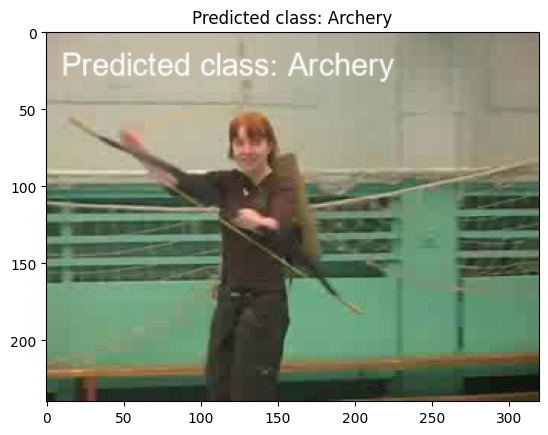

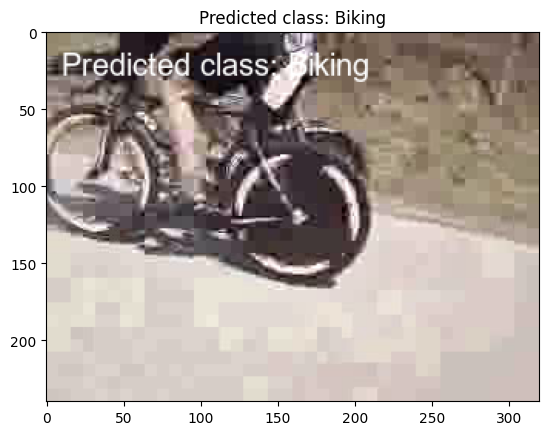

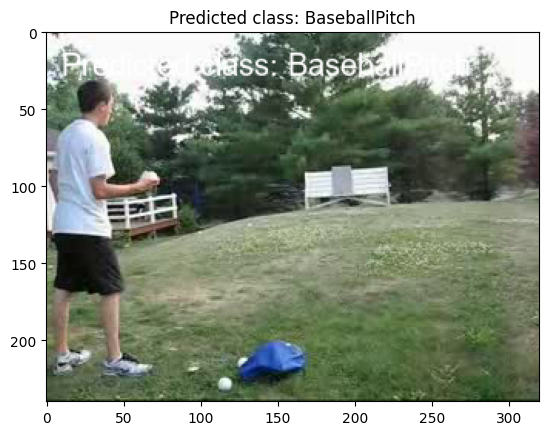

In [9]:


file_types = [("Video Files (*.avi, *.mp4)", "*.avi;*.mp4"), ("All files (*.*)", "*.*")]

def main():
    layout = [
        [sg.Image(key="-IMAGE-")],
        [
            sg.Text("Video File"),
            sg.Input(size=(25, 1), key="-FILE-"),
            sg.FileBrowse(file_types=file_types),
            sg.Button("Load Video"),
        ],
    ]
    window = sg.Window("Video Viewer", layout)
    while True:
        event, values = window.read()
        if event == "Exit" or event == sg.WIN_CLOSED:
            break
        if event == "Load Video":
            filename = values["-FILE-"]
            if os.path.exists(filename):
                predicted_label = predict_video_label(filename, saved_model)
#                 predicted_label = label_data.iloc[predicted_class]["labels"]
                
                # Extract a frame from the video
                cap = cv2.VideoCapture(filename)
                ret, frame = cap.read()
                cap.release()
                
                if ret:
                    # Convert the frame to a PIL Image
                    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    image = Image.fromarray(frame_rgb)
                    image.thumbnail((400, 400))
                    
                    # Draw the predicted label on the image
                    draw = ImageDraw.Draw(image)
                    font = ImageFont.truetype("arial.ttf", 20)
                    draw.text((10, 10), f"Predicted class: {predicted_label}", font=font, fill=(255, 255, 255))
                    
                    # Update the image in the PySimpleGUI window
                    bio = io.BytesIO()
                    image.save(bio, format="PNG")
                    window["-IMAGE-"].update(data=bio.getvalue())
                    
                    # Display the frame and the predicted label using pyplot
                    image_np = np.array(image)
                    plt.imshow(image_np)
                    plt.title(f"Predicted class: {predicted_label}")
                    plt.show()

    window.close()

if __name__ == "__main__":
    main()


In [9]:
saved_model

VideoModel(
  (slice_conv): Sequential(
    (0): BatchNorm2d(3, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
    (1): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU(inplace=True)
    (3): BatchNorm2d(20, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): BatchNorm2d(30, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
  )
  (conv3d): Sequential(
    (0): Conv3d(30, 50, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(50, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
    (2): ReLU(in

del model